In [1]:
# embedding file will be saved in BRANEnet_emb folder
!python BRANEnet.py --multilayer_networkfile 'Edgelist_R.gml' --T 3 --d 128


Computing embedding for: w=3;d=128
WARNING (theano.gof.compilelock): Overriding existing lock by dead process '45359' (I am process '45411')
Done!
Time in Seconds:5.90


In [2]:
#----------------------TF-target prediction----------------------

#for each TF split 50% of its targets into test and train sub-networks
#compute embedding for each training sub-network
#for each test and train set performing negative sampling to generate positive and negative samples


!python split_test_train.py  --multilayer_networkfile 'Edgelist_R.gml' --annotation_file 'annotation_file.txt'


Spliting train and test data....
Graph with 382 nodes and 3174 edges
Computing embedding for: w=3;d=128
Done!
Time in Seconds:6.41
-------Negative sampling  (split: 1) --------
Graph with 384 nodes and 3201 edges
Computing embedding for: w=3;d=128
Done!
Time in Seconds:4.91
-------Negative sampling  (split: 2) --------
Graph with 384 nodes and 3191 edges
Computing embedding for: w=3;d=128
Done!
Time in Seconds:5.06
-------Negative sampling  (split: 3) --------
Graph with 382 nodes and 3221 edges
Computing embedding for: w=3;d=128
Done!
Time in Seconds:4.48
-------Negative sampling  (split: 4) --------
Graph with 383 nodes and 3182 edges
Computing embedding for: w=3;d=128
Done!
Time in Seconds:4.40
-------Negative sampling  (split: 5) --------
Graph with 384 nodes and 3212 edges
Computing embedding for: w=3;d=128
Done!
Time in Seconds:4.36
-------Negative sampling  (split: 6) --------
Graph with 382 nodes and 3179 edges
Computing embedding for: w=3;d=128
Done!
Time in Seconds:5.05
-----

In [3]:
#Perform TF-target prediction
# op is the operator used for edge feature computation
!python predict_ppi.py  --op 'average'
!python predict_ppi.py  --op 'l2'

Operator: average
Train: 1; AUPR = 0.8519753863380292; AUROC = 0.9279661182158453
Train: 2; AUPR = 0.8784978441086062; AUROC = 0.9405688074640877
Train: 3; AUPR = 0.8690971868557946; AUROC = 0.9360235524049578
Train: 4; AUPR = 0.8538978868368485; AUROC = 0.9302442635589059
Train: 5; AUPR = 0.8505041778540288; AUROC = 0.9273884866446761
Train: 6; AUPR = 0.8712170824526257; AUROC = 0.9407481477708632
Train: 7; AUPR = 0.8746161079270481; AUROC = 0.938255154574893
Train: 8; AUPR = 0.8752838797420226; AUROC = 0.9389495744806663
Train: 9; AUPR = 0.8697369949514799; AUROC = 0.9355421813946349
Train: 10; AUPR = 0.8602864586347869; AUROC = 0.9333087493441158
Done!
Time in Seconds:4.17
Operator: l2
Train: 1; AUPR = 0.9750927737622139; AUROC = 0.9677907634123518
Train: 2; AUPR = 0.9800666784185642; AUROC = 0.9740946695982095
Train: 3; AUPR = 0.9810919625585741; AUROC = 0.9756542551312225
Train: 4; AUPR = 0.9800822957340913; AUROC = 0.9748381708179744
Train: 5; AUPR = 0.977170997106658; AUROC = 0.

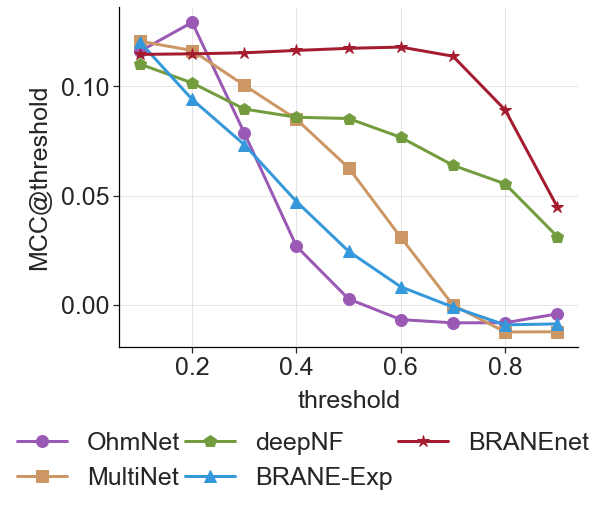

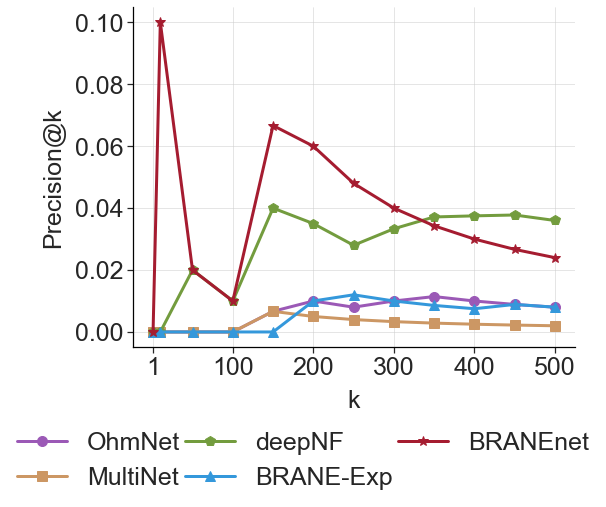

In [4]:
#Network reconstruction
%run network_reconstruction.py    

#Note that this code takes input precomputed embeddings of baseline methods. 
#In order to compare BRANEnet for user input multilyaer network, please recompute the embeddings for baseline method as well
#Make sure that embeddings compuited for all methods are of same size and share same node names/IDS



In [6]:
#To select edges above threshold and infer the the network from embeddings, please run script given below

%run ION_inference.py --emb 'BRANEnet_emb/BRANet_Edgelist_R_w_3_d_128.emb' --thres 0.7

#Result files generated include network file (weighted edge list) and files comtaining nodes in each module

                         #source               target  edge_score
38                          ABM1                 DAL4    0.745585
321                         ABM1              YHR022C    0.729641
693                         ACA1                 UGX2    0.734302
1678                        AHA1                 ALD3    0.774545
1681                        AHA1                 APE1    0.785256
...                          ...                  ...         ...
164672                   citrate            glutamine    0.840720
165517  fructose_1_6_biphosphate         myo_inositol    0.943001
168029                   glycine  thiamine_derivate_2    0.817572
171374                    serine            trehalose    0.848604
173886          udp_derivative_1     udp_derivative_2    0.888524

[1215 rows x 3 columns]


In [ ]:
# for generating figure and perform network analysis, we have used cytoscape "https://cytoscape.org/"
